In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

# Raw Data Loading
train = pd.read_csv('./data/digit-recognizer/train.csv')
test = pd.read_csv('./data/digit-recognizer/test.csv')

# # Data Split
# # 7:3 비율로 train과 test 분리
# # x_data_test, t_data_test는 맨끝에서 모델의 최종 Accuracy를 측정할 때 딱 한번 사용
# x_data_train, x_data_test, t_data_train, t_data_test = \
# train_test_split(df[['height','weight']], df['label'], test_size=0.3, random_state=0)

# # Normalization
# scaler = MinMaxScaler()
# scaler.fit(x_data_train)  # scaling을 하기 위한 정보를 scaler에 setting

# x_data_train_norm = scaler.transform(x_data_train)
# x_data_test_norm = scaler.transform(x_data_test)

# # Tensorflow 구현
# # 해당 데이터는 Multinomial이기 때문에 One-Hot Encoding일 이용해 데이터 변환 필요
# # 0 => 1 0 0
# # 1 => 0 1 0
# # 2 => 0 0 1
# sess = tf.Session()
# t_data_train_onehot = sess.run(tf.one_hot(t_data_train, depth=3))
# t_data_test_onehot = sess.run(tf.one_hot(t_data_test, depth=3))

# # Placeholder
# X = tf.placeholder(shape=[None,2], dtype=tf.float32)
# T = tf.placeholder(shape=[None,3], dtype=tf.float32)

# # Weight & bias
# W = tf.Variable(tf.random.normal([2,3]), name='weight')
# b = tf.Variable(tf.random.normal([3]), name='bias')

# # Hypothesis
# logit = tf.matmul(X,W) + b
# H = tf.nn.softmax(logit)

# # Loss Fucntion
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=T))

# # Train
# train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

# # 반복학습
# # parameter
# num_of_epoch = 1000
# batch_size = 100     # 한번에 학습할 x_data와 t_data의 행의 수

# def run_train(sess, train_x, train_t):
#     print('======= 학습시작 =======')
#     sess.run(tf.global_variables_initializer())
#     total_batch = int(train_x.shape[0] / batch_size)
    
#     for step in range(num_of_epoch):
#         for i in range(total_batch):
#             batch_x = train_x[i*batch_size:(i+1)*batch_size]
#             batch_t = train_t[i*batch_size:(i+1)*batch_size]
#             _, loss_val = sess.run([train,loss], feed_dict={X : batch_x, T : batch_t})

#         if step % 100 == 0 :
#             print('Loss : {}'.format(loss_val))
#     print('======= 학습종료 =======')
    
# # Evaluation(Accuracy)
# predict = tf.argmax(H,1)  # 1 => axis를 의미
# correct = tf.equal(predict, tf.argmax(T,1))
# accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# # Cross Validation
# cv = 5        # KFold의 K
# results = []   # 각 set에서 구한 accuracy를 집어넣을 list
# kf = KFold(n_splits=cv, shuffle=True)

# for training_idx, validation_idx in kf.split(x_data_train_norm):
#     train_x = x_data_train_norm[training_idx]
#     train_t = t_data_train_onehot[training_idx]
#     valid_x = x_data_train_norm[validation_idx]
#     valid_t = t_data_train_onehot[validation_idx]

#     run_train(sess, train_x, train_t)
#     results.append(sess.run(accuracy, feed_dict={X: valid_x, T : valid_t}))

# print('Cross Validation 결과 : {}'.format(np.mean(results)))

In [ ]:
# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(train.iloc[:,1:], train['label'], test_size=0.3, random_state=0)

In [ ]:
# Normalization
scaler = MinMaxScaler()
scaler.fit(x_data_train)  # scaling을 하기 위한 정보를 scaler에 setting

x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

In [ ]:
sess = tf.Session()
t_data_train_onehot = sess.run(tf.one_hot(t_data_train, depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test, depth=10))

In [ ]:
# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([784,10]), name='weight')
b = tf.Variable(tf.random.normal([10]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Loss Fucntion
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=T))

# Train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

# 반복학습
# parameter
num_of_epoch = 1000
batch_size = 100     # 한번에 학습할 x_data와 t_data의 행의 수

def run_train(sess, train_x, train_t):
    print('======= 학습시작 =======')
    sess.run(tf.global_variables_initializer())
    total_batch = int(train_x.shape[0] / batch_size)
    
    for step in range(num_of_epoch):
        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X : batch_x, T : batch_t})

        if step % 100 == 0 :
            print('Loss : {}'.format(loss_val))
    print('======= 학습종료 =======')

In [ ]:
# Evaluation(Accuracy)
predict = tf.argmax(H,1)  # 1 => axis를 의미
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# Cross Validation
cv = 5        # KFold의 K
results = []   # 각 set에서 구한 accuracy를 집어넣을 list
kf = KFold(n_splits=cv, shuffle=True)

for training_idx, validation_idx in kf.split(x_data_train_norm):
    train_x = x_data_train_norm[training_idx]
    train_t = t_data_train_onehot[training_idx]
    valid_x = x_data_train_norm[validation_idx]
    valid_t = t_data_train_onehot[validation_idx]

    run_train(sess, train_x, train_t)
    results.append(sess.run(accuracy, feed_dict={X: valid_x, T : valid_t}))

print('Cross Validation 결과 : {}'.format(np.mean(results)))

In [ ]:
# 학습진행
run_train(sess, x_data_train_norm, t_data_train_onehot)

# Accuracy 측정
result = sess.run(accuracy, feed_dict={X: x_data_test_norm, T : t_data_test_onehot})
print('최종 Accuracy : {}'.format(result))

# Prediction
test_scaled = scaler.transform(test)

result = sess.run(H, feed_dict={X : test_scaled})

In [ ]:
print(np.argmax(result[0]))
print(result.shape)

In [ ]:
df = pd.DataFrame()
imageid = list(range(1,result.shape[0]+1))
label = []

for i in range(result.shape[0]):
    label.append(np.argmax(result[i]))
    
df['ImageId'] = imageid
df['Label'] = label

df.to_csv('./submission.csv', index=False)

In [ ]:
### 2020/10/16

In [ ]:
%reset

# Tensorflow 1.15버전
# multinomial classification으로 MNIST 구현

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# Raw Data Loading
df = pd.read_csv('./data/mnist/train.csv')

##### 결측치와 이상치는 없음 #####

##### 이미지 확인 #####
img_data = df.drop('label', axis=1, inplace=False).values

fig = plt.figure()
fig_arr = []

for n in range(10):
    fig_arr.append(fig.add_subplot(2,5,n+1))
    fig_arr[n].imshow(img_data[n].reshape(28,28), cmap='Greys')

plt.tight_layout()
plt.show()


# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

##### Tensorflow implementation #####

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([784,10]), name='weight')
b = tf.Variable(tf.random.normal([10]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)   # softmax activation function

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 200
batch_size = 100


# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, T:batch_t})

        if step % 20 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)

   
# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm})
print(classification_report(t_data_test,result.ravel()))

In [ ]:
%reset

# Tensorflow 1.15버전
# DNN(초기화, activation function, dropout처리 안함)으로 MNIST 구현

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape)

##### 결측치와 이상치는 없음 #####

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

##### Tensorflow implementation #####

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# del t_data_train
# del t_data_test

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W2 = tf.Variable(tf.random.normal([784,256]), name='weight2')
b2 = tf.Variable(tf.random.normal([256]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(X,W2) + b2)

W3 = tf.Variable(tf.random.normal([256,128]), name='weight3')
b3 = tf.Variable(tf.random.normal([128]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2,W3) + b3)

W4 = tf.Variable(tf.random.normal([128,10]), name='weight4')
b4 = tf.Variable(tf.random.normal([10]), name='bias4')

# Hypothesis
logit = tf.matmul(layer3,W4) + b4
H = tf.nn.softmax(logit)   # softmax activation function

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 500
batch_size = 100


# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, T:batch_t})

        if step % 50 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm})
print(classification_report(t_data_test,result.ravel()))
# Test Set 정확도 : 0.93

In [ ]:
%reset

# Tensorflow 1.15버전
# DNN(dropout처리 안함)으로 MNIST 구현

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape)

##### 결측치와 이상치는 없음 #####

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

##### Tensorflow implementation #####

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# del t_data_train
# del t_data_test

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
# He's 초기화
W2 = tf.get_variable('w2', shape=[784,256], initializer=tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.random.normal([256]), name='bias2')
layer2 = tf.nn.relu(tf.matmul(X,W2) + b2)

W3 = tf.get_variable('w3', shape=[256,128], initializer=tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.random.normal([128]), name='bias3')
layer3 = tf.nn.relu(tf.matmul(layer2,W3) + b3)

W4 = tf.get_variable('w4', shape=[128,10], initializer=tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.random.normal([10]), name='bias4')

# Hypothesis
logit = tf.matmul(layer3,W4) + b4
H = tf.nn.softmax(logit)   # softmax activation function

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 500
batch_size = 100


# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, T:batch_t})

        if step % 50 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm})
print(classification_report(t_data_test,result.ravel()))

In [5]:
# Tensorflow 1.15버전
# DNN으로 MNIST 구현

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler        # Normalization
from sklearn.model_selection import train_test_split  # train, test 분리
from sklearn.metrics import classification_report

# 그래프 초기화
tf.reset_default_graph()

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')
display(df.head(), df.shape)

##### 결측치와 이상치는 없음 #####

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)
# test_size : test set의 비율 (0.3 => 30%)
# random_state : split할 때 랜덤하게 split하게 되는데 이를 일정하게 고정(seed의 개념)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

del x_data_train
del x_data_test

##### Tensorflow implementation #####

sess = tf.Session()

t_data_train_onehot = sess.run(tf.one_hot(t_data_train,depth=10))
t_data_test_onehot = sess.run(tf.one_hot(t_data_test,depth=10))

# del t_data_train
# del t_data_test

# Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)  # dropout할 떄 사용할 비율

# Weight & bias
# He's 초기화
W1 = tf.get_variable('w1', shape=[784,256], initializer=tf.contrib.layers.variance_scaling_initializer())
b1 = tf.Variable(tf.random.normal([256]), name='bias1')
_hidden1 = tf.nn.relu(tf.matmul(X,W1) + b1)
hidden1 = tf.nn.dropout(_hidden1, rate=drop_rate)

W2 = tf.get_variable('w2', shape=[256,128], initializer=tf.contrib.layers.variance_scaling_initializer())
b2 = tf.Variable(tf.random.normal([128]), name='bias2')
_hidden2 = tf.nn.relu(tf.matmul(hidden1,W2) + b2)
hidden2 = tf.nn.dropout(_hidden2, rate=drop_rate)

W3 = tf.get_variable('w3', shape=[128,10], initializer=tf.contrib.layers.variance_scaling_initializer())
b3 = tf.Variable(tf.random.normal([10]), name='bias3')

# Hypothesis
logit = tf.matmul(hidden2,W3) + b3
H = tf.nn.softmax(logit)   # softmax activation function

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# parameter
num_of_epoch = 500
batch_size = 100


# 학습
def run_train(sess, train_x, train_t):
    print('### Starting Training ###')
    # 초기화
    sess.run(tf.global_variables_initializer())
    
    for step in range(num_of_epoch):
        total_batch = int(train_x.shape[0] / batch_size)

        for i in range(total_batch):
            batch_x = train_x[i*batch_size:(i+1)*batch_size]
            batch_t = train_t[i*batch_size:(i+1)*batch_size]
            _, loss_val = sess.run([train,loss], feed_dict={X:batch_x, T:batch_t, drop_rate:0.3})

        if step % 50 == 0:
            print('Loss : {}'.format(loss_val))
    print('### End Training ###')

    
# Accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(T,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# Testing
run_train(sess,x_data_train_norm,t_data_train_onehot) # 학습
print('### Test Set으로 Accuracy 측정 ###')
result = sess.run(predict, feed_dict={X:x_data_test_norm, drop_rate:0})  # test할 때는 모든 노드를 켠 상태에서 해야 함
print(classification_report(t_data_test,result.ravel()))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(42000, 785)

### Starting Training ###
Loss : 0.3780944049358368
Loss : 0.040455326437950134
Loss : 0.0035565667785704136
Loss : 0.0036169844679534435
Loss : 0.005395825952291489
Loss : 0.004061732906848192
Loss : 0.0022698023822158575
Loss : 0.007384584750980139
Loss : 0.0005915524670854211
Loss : 0.00011184781033080071
### End Training ###
### Test Set으로 Accuracy 측정 ###
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1242
           1       0.98      0.99      0.99      1429
           2       0.97      0.99      0.98      1276
           3       0.98      0.96      0.97      1298
           4       0.97      0.98      0.98      1236
           5       0.97      0.98      0.98      1119
           6       0.98      0.99      0.99      1243
           7       0.98      0.98      0.98      1334
           8       0.97      0.96      0.97      1204
           9       0.98      0.95      0.97      1219

    accuracy                           0.9

In [17]:
# Tensorflow 2.1

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Raw Data Loading
df = pd.read_csv('./data/digit-recognizer/train.csv')

# 결측치나 이상치는 없음
# Feature Engineering 할 필요가 없음

# Data Split
x_data_train, x_data_test, t_data_train, t_data_test = \
train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=0)

# Min-Max Normalization
scaler = MinMaxScaler()   # scaler = StandardScaler()
scaler.fit(x_data_train)
x_data_train_norm = scaler.transform(x_data_train)
x_data_test_norm = scaler.transform(x_data_test)

# TF 2.1 구현
model = Sequential()
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform',
                input_shape=(x_data_train_norm.shape[1],)))  # input_shape로 input layer의 역할까지도 처리
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax', kernel_initializer='he_uniform'))

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',   # sparse를 붙여주면 one-hot encoing 작업을 생략 가능
              metrics=['sparse_categorical_accuracy'])

history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.3)

Train on 20580 samples, validate on 8820 samples
Epoch 1/100
20580/20580 [==============================] - 3s 159us/sample - loss: 0.5916 - sparse_categorical_accuracy: 0.8138 - val_loss: 0.2393 - val_sparse_categorical_accuracy: 0.9289
Epoch 2/100
20580/20580 [==============================] - 2s 96us/sample - loss: 0.2530 - sparse_categorical_accuracy: 0.9236 - val_loss: 0.1819 - val_sparse_categorical_accuracy: 0.9466
Epoch 3/100
20580/20580 [==============================] - 2s 97us/sample - loss: 0.1817 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.1515 - val_sparse_categorical_accuracy: 0.9541
Epoch 4/100
20580/20580 [==============================] - 2s 95us/sample - loss: 0.1449 - sparse_categorical_accuracy: 0.9559 - val_loss: 0.1366 - val_sparse_categorical_accuracy: 0.9587
Epoch 5/100
20580/20580 [==============================] - 2s 88us/sample - loss: 0.1219 - sparse_categorical_accuracy: 0.9626 - val_loss: 0.1332 - val_sparse_categorical_accuracy: 0.9599
Epoch 6/10

20580/20580 [==============================] - 2s 92us/sample - loss: 0.0146 - sparse_categorical_accuracy: 0.9946 - val_loss: 0.1493 - val_sparse_categorical_accuracy: 0.9718
Epoch 45/100
20580/20580 [==============================] - 2s 93us/sample - loss: 0.0108 - sparse_categorical_accuracy: 0.9964 - val_loss: 0.1550 - val_sparse_categorical_accuracy: 0.9736
Epoch 46/100
20580/20580 [==============================] - 2s 90us/sample - loss: 0.0149 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.1602 - val_sparse_categorical_accuracy: 0.9726
Epoch 47/100
20580/20580 [==============================] - 2s 94us/sample - loss: 0.0187 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.1529 - val_sparse_categorical_accuracy: 0.9734
Epoch 48/100
20580/20580 [==============================] - 2s 89us/sample - loss: 0.0148 - sparse_categorical_accuracy: 0.9951 - val_loss: 0.1508 - val_sparse_categorical_accuracy: 0.9737
Epoch 49/100
20580/20580 [==============================] - 2s 89us/

20580/20580 [==============================] - 2s 89us/sample - loss: 0.0091 - sparse_categorical_accuracy: 0.9972 - val_loss: 0.1906 - val_sparse_categorical_accuracy: 0.9729
Epoch 88/100
20580/20580 [==============================] - 2s 88us/sample - loss: 0.0085 - sparse_categorical_accuracy: 0.9971 - val_loss: 0.1827 - val_sparse_categorical_accuracy: 0.9730
Epoch 89/100
20580/20580 [==============================] - 2s 89us/sample - loss: 0.0123 - sparse_categorical_accuracy: 0.9968 - val_loss: 0.2085 - val_sparse_categorical_accuracy: 0.9736
Epoch 90/100
20580/20580 [==============================] - 2s 90us/sample - loss: 0.0133 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.1739 - val_sparse_categorical_accuracy: 0.9745
Epoch 91/100
20580/20580 [==============================] - 2s 89us/sample - loss: 0.0125 - sparse_categorical_accuracy: 0.9961 - val_loss: 0.1724 - val_sparse_categorical_accuracy: 0.9754
Epoch 92/100
20580/20580 [==============================] - 2s 89us/

In [18]:
result = np.argmax(model.predict(x_data_test_norm), axis=1)
print(classification_report(t_data_test, result))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1242
           1       0.98      0.99      0.99      1429
           2       0.98      0.98      0.98      1276
           3       0.97      0.98      0.97      1298
           4       0.98      0.97      0.98      1236
           5       0.97      0.97      0.97      1119
           6       0.97      0.99      0.98      1243
           7       0.98      0.97      0.97      1334
           8       0.97      0.96      0.96      1204
           9       0.97      0.96      0.97      1219

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


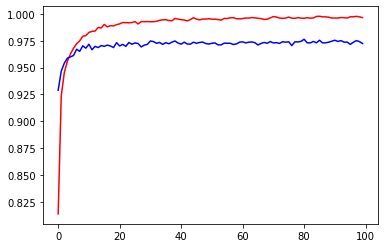

In [21]:
import matplotlib.pyplot as plt

print(history.history.keys())
plt.plot(history.history['sparse_categorical_accuracy'], color='r')
plt.plot(history.history['val_sparse_categorical_accuracy'], color='b')
plt.show()